Link al repositorio de Github: https://github.com/100461170/AA_practica_2_grupo_10

Para subir los archivos y demás a lo largo de los diferentes cuadernos hemos estado usando Drive ya que es muy rápido y cómodo, en vez de subir los archivos manualmente

Autores: Alejandro Díaz Cuéllar 100472173 y Tomás Mendizábal 100461170

```
// ASEGURARSE DE PONER RANDOM_STATE = SEED EN TODO LO QUE SE PUEDA PARA QUE LOS RESULTADOS SEAN REPRODUCIBLES
```

# **Obtener los datos**

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np

# Si quieres subir el archivo wind_ava.csv desde tu ordenador
#uploaded = files.upload()

# Montar el drive para incluir el archivo desde ahí
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
seed = 100472173
# Leer el archivo CSV utilizando Pandas
df = pd.read_csv("/content/drive/MyDrive/AA_P2_Grupo10/stars_data.csv")

# **1.- Programar nuestro propio KMeans**

## 1.1.- Implementación

In [ ]:
"""# Funcion KMeans. Al tener que ser una funcion, directamente hacemos que sea el fit
# del KMeans de ScikitLearn
def my_kmeans(data, n_clusters, good_init=False):
  # Si el good_init está activado, haremos 10 iteraciones
  if good_init:
    iterations = 10
  else:
    iterations = 1
  # Para almacenar los resultados e inertias de cada iteracion
  inertias = []
  results = []
  for i in range(iterations):
    converger = False
    # Cogemos los centroides iniciales seleccionando aleatoriamente n_clusters
    # instancias de los datos
    centroids = data[np.random.choice(data.shape[0], n_clusters, replace=False)]
    while not converger:
      # Calculamos la distancia euclidea de cada elemento del dataset a cada
      # centroide
      distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
      # La label de cada centroide será el centroide del que estén mas cerca
      labels = np.argmin(distances, axis=1)
      # Calculamos los nuevos centroides cogiendo la media de los elementos
      # asignados a cada label
      new_centroids = np.array([data[labels == k].mean(axis=0) for k in range(n_clusters)])
      # Miramos si ha convergido
      if np.allclose(centroids, new_centroids):
          converger = True
      centroids = new_centroids
    results.append(labels)
    # Calculamos la inercia
    inertia = 0
    for k in range(len(centroids)):
        inertia += np.sum((data[labels == k] - centroids[k])**2)
    inertias.append(inertia)
  # Devolvemos los centroides cuyo modelo tenga menos inercia
  winner = inertias.index(min(inertias))
  return results[winner]""";

def my_kmeans(data, n_clusters, good_init=False):
  # Si el good_init está activado, haremos 10 iteraciones
  if good_init:
      iterations = 10
  else:
      iterations = 1

  # Para almacenar los resultados, inertias y centroides de cada iteración
  inertias = []
  results = []
  centroids_list = []

  for i in range(iterations):
      converger = False
      # Cogemos los centroides iniciales seleccionando aleatoriamente n_clusters instancias de los datos
      centroids = data[np.random.choice(data.shape[0], n_clusters, replace=False)]

      while not converger:
          # Calculamos la distancia euclidiana de cada elemento del dataset a cada centroide
          distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
          # La label de cada centroide será el centroide del que estén más cerca
          labels = np.argmin(distances, axis=1)
          # Calculamos los nuevos centroides cogiendo la media de los elementos asignados a cada label
          new_centroids = np.array([data[labels == k].mean(axis=0) for k in range(n_clusters)])
          # Miramos si ha convergido
          if np.allclose(centroids, new_centroids):
              converger = True
          centroids = new_centroids

      results.append(labels)

      # Calculamos la inercia
      inertia = 0
      for k in range(len(centroids)):
          inertia += np.sum((data[labels == k] - centroids[k])**2)
      inertias.append(inertia)

      # Almacenamos los centroides de esta iteración
      centroids_list.append(centroids)

  # Seleccionamos los resultados y centroides de la iteración con la menor inercia
  winner = inertias.index(min(inertias))
  return results[winner], centroids_list[winner]


## 1.2.- Pruebas

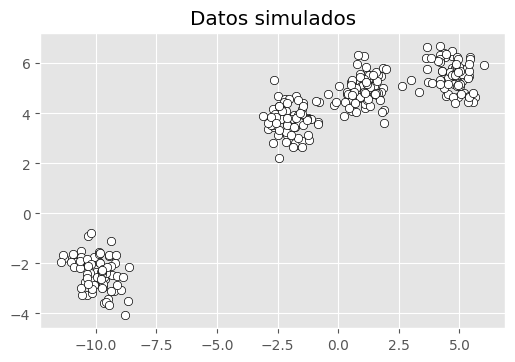

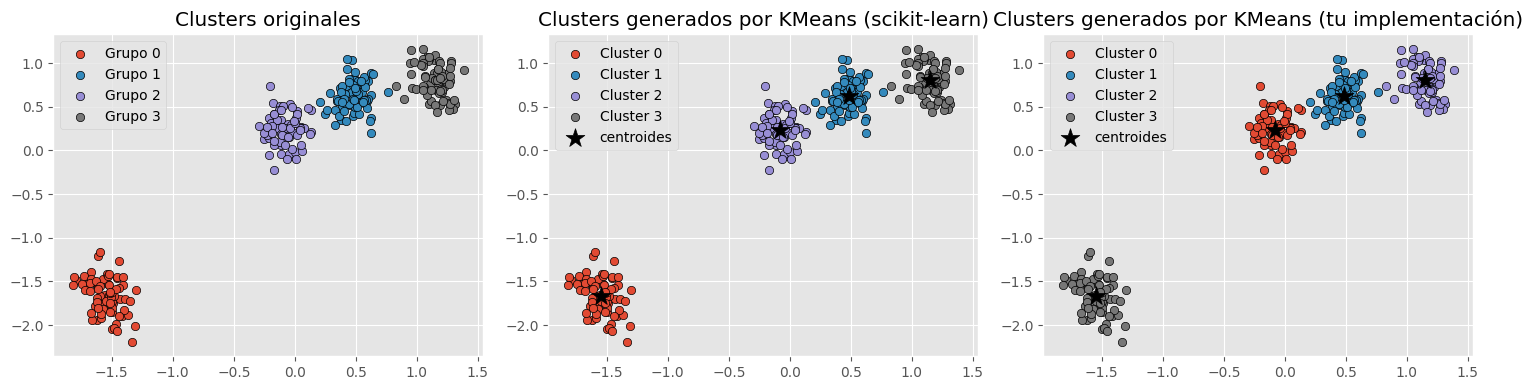

Métricas de evaluación para tu implementación de KMeans:
Silhouette Score: 0.6869234091100377
Adjusted Rand Index: 1.0
Completeness Score: 1.0

Métricas de evaluación para KMeans de scikit-learn:
Silhouette Score: 0.6869234091100377
Adjusted Rand Index: 1.0
Completeness Score: 1.0


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, completeness_score
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


X, y = make_blobs(
    n_samples    = 300,
    n_features   = 2,
    centers      = 4,
    cluster_std  = 0.60,
    shuffle      = True,
    random_state = seed
)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1],
    c = 'white',
    marker    = 'o',
    edgecolor = 'black',
)
ax.set_title('Datos simulados');

X_scaled = scale(X)

# Ajustar tu implementación de KMeans
labels_custom, centroids_custom = my_kmeans(X_scaled, 4)

# Ajustar el KMeans de scikit-learn
sklearn_kmeans = KMeans(n_clusters=4, random_state=seed)
sklearn_kmeans.fit(X=X_scaled)
labels_sklearn = sklearn_kmeans.predict(X_scaled)
"""
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Grupos originales
for i in np.unique(y):
    ax[0].scatter(
        x = X_scaled[y == i, 0],
        y = X_scaled[y == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )

ax[0].set_title('Clusters originales')
ax[0].legend();

for i in np.unique(labels_sklearn):
    ax[1].scatter(
        x = X_scaled[labels_sklearn == i, 0],
        y = X_scaled[labels_sklearn == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

ax[1].scatter(
    x = sklearn_kmeans.cluster_centers_[:, 0],
    y = sklearn_kmeans.cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[1].set_title('Clusters generados por Kmeans')
ax[1].legend();

""";
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Grupos originales
for i in np.unique(y):
    ax[0].scatter(
        x = X_scaled[y == i, 0],
        y = X_scaled[y == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )

ax[0].set_title('Clusters originales')
ax[0].legend();

# KMeans de scikit-learn
for i in np.unique(labels_sklearn):
    ax[1].scatter(
        x = X_scaled[labels_sklearn == i, 0],
        y = X_scaled[labels_sklearn == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

ax[1].scatter(
    x = sklearn_kmeans.cluster_centers_[:, 0],
    y = sklearn_kmeans.cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[1].set_title('Clusters generados por KMeans (scikit-learn)')
ax[1].legend();

# Tu implementación de KMeans
for i in np.unique(labels_custom):
    ax[2].scatter(
        x = X_scaled[labels_custom == i, 0],
        y = X_scaled[labels_custom == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

ax[2].scatter(
    x = centroids_custom[:, 0],
    y = centroids_custom[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[2].set_title('Clusters generados por KMeans (tu implementación)')
ax[2].legend();

plt.tight_layout()
plt.show()


# Calcular algunas métricas de evaluación
silhouette_custom = silhouette_score(X_scaled, labels_custom)
silhouette_sklearn = silhouette_score(X_scaled, labels_sklearn)

ari_custom = adjusted_rand_score(y, labels_custom)
ari_sklearn = adjusted_rand_score(y, labels_sklearn)

completeness_custom = completeness_score(y, labels_custom)
completeness_sklearn = completeness_score(y, labels_sklearn)

# Imprimir las métricas
print("Métricas de evaluación para tu implementación de KMeans:")
print("Silhouette Score:", silhouette_custom)
print("Adjusted Rand Index:", ari_custom)
print("Completeness Score:", completeness_custom)
print()

print("Métricas de evaluación para KMeans de scikit-learn:")
print("Silhouette Score:", silhouette_sklearn)
print("Adjusted Rand Index:", ari_sklearn)
print("Completeness Score:", completeness_sklearn)

```
// FALTA HACER EL ANÁLISIS DE RESULTADOS AQUÍ
```

# **2.- Uso de 2 algoritmos de Clustering**

## 2.1.- Transformación de los datos

Primero vamos a transformar los colores del dataset para que sean más uniformes

In [ ]:
# Establecemos una unificación de colores:
mapping = {   # Diccionario con formato Target : List of current values
    'Red': ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['yellowish', 'Yellowish'],
    'White-Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
}
# Mapeamos los datos
for target_color, source_colors in mapping.items():
  df.loc[df.Color.isin(source_colors), 'Color'] = target_color

Codificamos el dataframe de dos formas, con One Hot Encoding y con Ordinal Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# ONE HOT ENCODING
# Seleccionar las columnas con variables categóricas
categorical_cols = ['Spectral_Class', 'Color']
encoder = OneHotEncoder(sparse=False, drop='first')
# Ajustar y transformar las variables categóricas
encoded_cols = encoder.fit_transform(df[categorical_cols])
# Convertir la salida a un DataFrame
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))
# Concatenar los DataFrames codificados con el DataFrame original
df_OH = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

# ORDINAL ENCODING
df_OR = df.copy()
colors = list(mapping.keys())
spectral = ['O', 'B', 'A', 'F', 'G', 'K', 'M']
# Crear un codificador OrdinalEncoder con el orden deseado
encoder = OrdinalEncoder(categories=[spectral, colors])
# Ajustar y transformar los datos
encoded_data = encoder.fit_transform(df_OR[categorical_cols])
# Reemplazar las columnas categóricas originales con las codificadas
df_OR['Spectral_Class'] = encoded_data[:, 0]
df_OR['Color'] = encoded_data[:, 1]

# print(df_OH)
# print(df_OR)

Ahora extraemos dos componentes PCA

```
// NO SÉ SI LO DE APLICAR STANDARD ESTÁ BIEN POR EL TEMA DE LAS VARIABLES CODIFICADAS
```

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_OH_scaled = scaler.fit_transform(df_OH)
# X_OR_scaled = scaler.fit_transform(df_OR)
X_OH_scaled = scale(df_OH)
X_OR_scaled = scale(df_OR)
# Creamos un objeto PCA con 2 componentes
pca = PCA(n_components=2)

# Aplicamos PCA a los datos estandarizados
X_OH_PCA = pca.fit_transform(X_OH_scaled)
X_OR_PCA = pca.fit_transform(X_OR_scaled)

## 2.2.- Algoritmo 1: KMeans

Lo primero que vamos a hacer es calcular el número óptimo de clusters a introducir en KMeans para cada uno de los distintas codificaciones

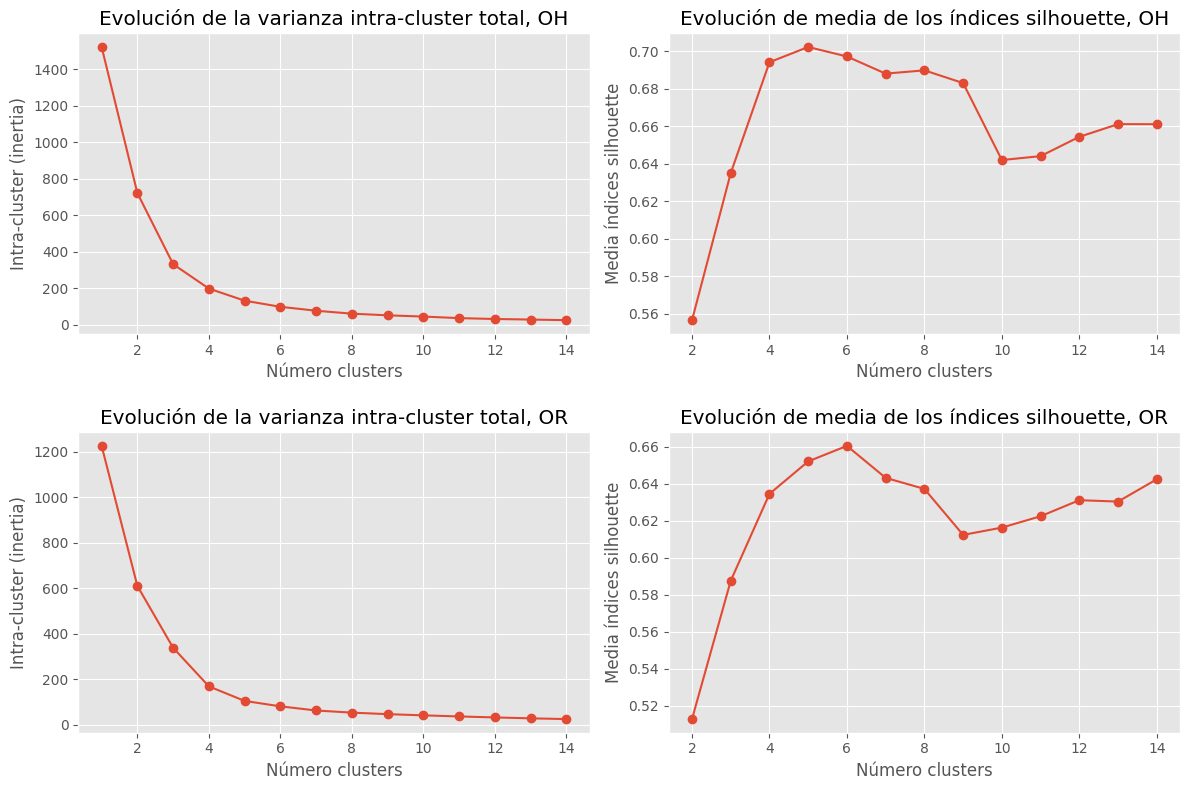

In [ ]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)

inertias = []
for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = seed
    )
    modelo_kmeans.fit(X_OH_PCA)
    inertias.append(modelo_kmeans.inertia_)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(range_n_clusters, inertias, marker='o')
axes[0, 0].set_title("Evolución de la varianza intra-cluster total, OH")
axes[0, 0].set_xlabel('Número clusters')
axes[0, 0].set_ylabel('Intra-cluster (inertia)');

inertias = []
for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = seed
    )
    modelo_kmeans.fit(X_OR_PCA)
    inertias.append(modelo_kmeans.inertia_)
axes[1, 0].plot(range_n_clusters, inertias, marker='o')
axes[1, 0].set_title("Evolución de la varianza intra-cluster total, OR")
axes[1, 0].set_xlabel('Número clusters')
axes[1, 0].set_ylabel('Intra-cluster (inertia)');

# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = seed
    )
    cluster_labels = modelo_kmeans.fit_predict(X_OH_PCA)
    silhouette_avg = silhouette_score(X_OH_PCA, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
axes[0, 1].plot(range_n_clusters, valores_medios_silhouette, marker='o')
axes[0, 1].set_title("Evolución de media de los índices silhouette, OH")
axes[0, 1].set_xlabel('Número clusters')
axes[0, 1].set_ylabel('Media índices silhouette');

valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = seed
    )
    cluster_labels = modelo_kmeans.fit_predict(X_OR_PCA)
    silhouette_avg = silhouette_score(X_OR_PCA, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
axes[1, 1].plot(range_n_clusters, valores_medios_silhouette, marker='o')
axes[1, 1].set_title("Evolución de media de los índices silhouette, OR")
axes[1, 1].set_xlabel('Número clusters')
axes[1, 1].set_ylabel('Media índices silhouette')

plt.tight_layout(h_pad=2.0)
plt.show()

Como vemos, en este caso el metodo elbow es algo difuso y es mejor si nos guiamos por el silhouette score para elegir el número de clusters. Como vemos hay una ligera diferencia entre el dataset con One Hot Encoding y el Ordinal. El número óptimo de clusters para One Hot va a ser 5, mientras que para Ordinal será 6.

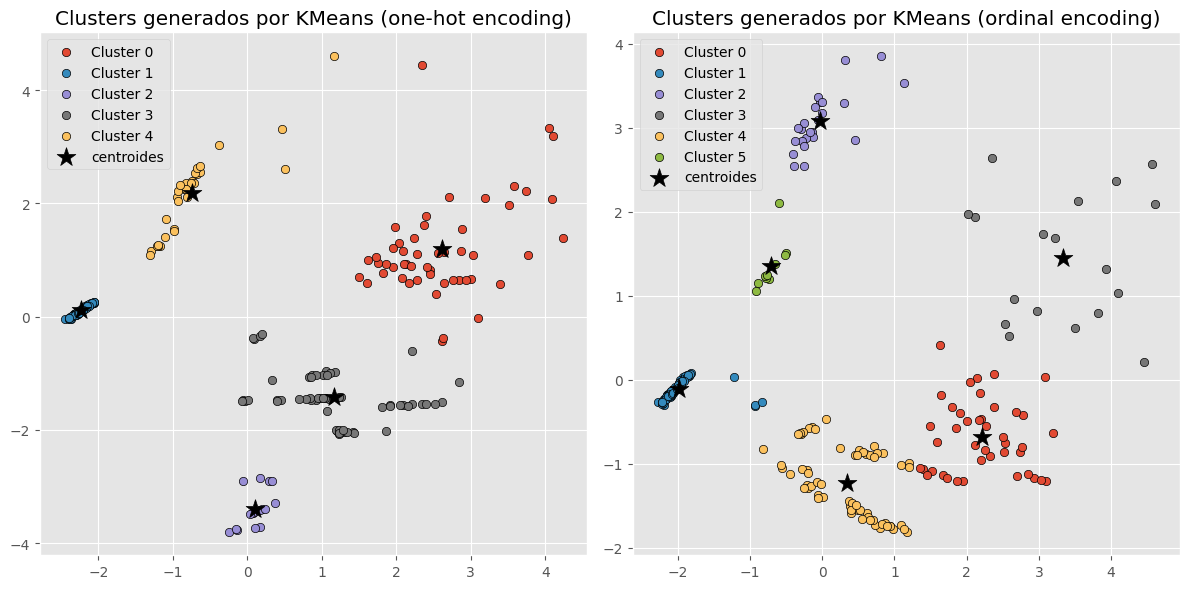

Inertia (One-Hot Encoding): 132.68572263524803
Silhouette Score (One-Hot Encoding): 0.7023144728430835
Inertia (Ordinal Encoding): 80.70203003813528
Silhouette Score (Ordinal Encoding): 0.6605298437727174


In [ ]:
kmeans_oh = KMeans(n_clusters=5, random_state = seed)
kmeans_or = KMeans(n_clusters=6, random_state = seed)

# ONE HOT ENCODING
labels_OH = kmeans_oh.fit_predict(X_OH_PCA)

# ORDINAL ENCODING
labels_OR = kmeans_or.fit_predict(X_OR_PCA)

# Calcular la inercia y la puntuación de silueta para las etiquetas de one-hot encoding
inertia_OH = kmeans_oh.inertia_
silhouette_score_OH = silhouette_score(X_OH_PCA, labels_OH)

# Calcular la inercia y la puntuación de silueta para las etiquetas de ordinal encoding
inertia_OR = kmeans_or.inertia_
silhouette_score_OR = silhouette_score(X_OR_PCA, labels_OR)

# Crea una figura y ejes para el gráfico
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para ONE HOT ENCODING
for i in np.unique(labels_OH):
    ax[0].scatter(
        x = X_OH_PCA[labels_OH == i, 0],
        y = X_OH_PCA[labels_OH == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

ax[0].scatter(
    x = kmeans_oh.cluster_centers_[:, 0],
    y = kmeans_oh.cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[0].set_title('Clusters generados por KMeans (one-hot encoding)')
ax[0].legend()

# Gráfico para ORDINAL ENCODING
for i in np.unique(labels_OR):
    ax[1].scatter(
        x = X_OR_PCA[labels_OR == i, 0],
        y = X_OR_PCA[labels_OR == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

ax[1].scatter(
    x = kmeans_or.cluster_centers_[:, 0],
    y = kmeans_or.cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[1].set_title('Clusters generados por KMeans (ordinal encoding)')
ax[1].legend()

plt.tight_layout()
plt.show()

print("Inertia (One-Hot Encoding):", inertia_OH)
print("Silhouette Score (One-Hot Encoding):", silhouette_score_OH)
print("Inertia (Ordinal Encoding):", inertia_OR)
print("Silhouette Score (Ordinal Encoding):", silhouette_score_OR);

Como podemos observar, aunque la silhouette score del One Hot encoding es ligeramente superior, la inercia del Ordinal es bastante más baja

## 2.3.- Algoritmo 2: DBSCAN

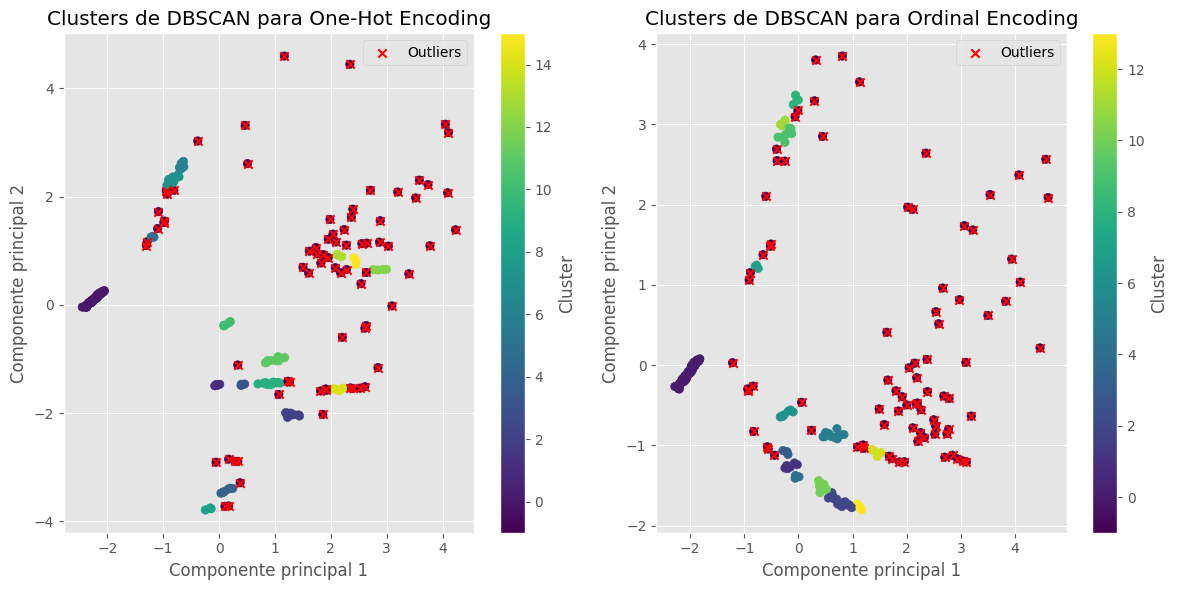

Número de clusters encontrados OH: 16
Número de outliers encontrados OH: 75
Silhouette score para One-Hot Encoding: 0.3301715178711316
Número de clusters encontrados OR: 14
Número de outliers encontrados OR: 85
Silhouette score para Ordinal Encoding: 0.30828406940625425


In [ ]:
"""from sklearn.cluster import DBSCAN

# Modelo
# ==============================================================================
modelo_dbscan_oh = DBSCAN(
    eps          = 0.2,
    min_samples  = 5,
    metric       = 'euclidean',
)

modelo_dbscan_oh.fit(X_OH_PCA)
labels_oh = modelo_dbscan_oh.labels_


# Modelo
# ==============================================================================
modelo_dbscan_or = DBSCAN(
    eps          = 0.2,
    min_samples  = 5,
    metric       = 'euclidean',
)

modelo_dbscan_or.fit(X_OR_PCA)
labels_or = modelo_dbscan_or.labels_


# Crear figura y ejes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Dibujo para OH
scatter_oh = axes[0].scatter(X_OH_PCA[:, 0], X_OH_PCA[:, 1], c=labels_oh, cmap='viridis', marker='o')
axes[0].set_title('Clusters de DBSCAN para One-Hot Encoding')
axes[0].set_xlabel('Componente principal 1')
axes[0].set_ylabel('Componente principal 2')
fig.colorbar(scatter_oh, ax=axes[0], label='Cluster')

# Dibujo para OR
scatter_or = axes[1].scatter(X_OR_PCA[:, 0], X_OR_PCA[:, 1], c=labels_or, cmap='viridis', marker='o')
axes[1].set_title('Clusters de DBSCAN para Ordinal Encoding')
axes[1].set_xlabel('Componente principal 1')
axes[1].set_ylabel('Componente principal 2')
fig.colorbar(scatter_or, ax=axes[1], label='Cluster')

# Ajustar diseño
plt.tight_layout()
plt.show()
# Número de clusters y observaciones "outliers"
# ==============================================================================
n_clusters = len(set(labels_oh)) - (1 if -1 in labels_oh else 0)
n_noise    = list(labels_oh).count(-1)

print(f'Número de clusters encontrados OH: {n_clusters}')
print(f'Número de outliers encontrados OH: {n_noise}')

# Número de clusters y observaciones "outliers"
# ==============================================================================
n_clusters = len(set(labels_or)) - (1 if -1 in labels_or else 0)
n_noise    = list(labels_or).count(-1)

print(f'Número de clusters encontrados OR: {n_clusters}')
print(f'Número de outliers encontrados OR: {n_noise}')"""

from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

silhouette_scorer = make_scorer(silhouette_score)

param_grid = {
    'eps': [0.1, 0.2, 0.3, 0.4],
    'min_samples': [3, 5, 7, 10],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

# Modelo DBSCAN
modelo_dbscan = DBSCAN()

# Realizar la búsqueda de hiperparámetros
grid_search_oh = GridSearchCV(estimator=modelo_dbscan, param_grid=param_grid, cv=3, scoring=silhouette_scorer)
grid_search_oh.fit(X_OH_PCA)

grid_search_or = GridSearchCV(estimator=modelo_dbscan, param_grid=param_grid, cv=3, scoring=silhouette_scorer)
grid_search_or.fit(X_OR_PCA)

# Obtener las etiquetas óptimas y los mejores parámetros para OH
labels_oh = grid_search_oh.best_estimator_.fit_predict(X_OH_PCA)
best_params_oh = grid_search_oh.best_params_

# Obtener las etiquetas óptimas y los mejores parámetros para OR
labels_or = grid_search_or.best_estimator_.fit_predict(X_OR_PCA)
best_params_or = grid_search_or.best_params_

# Crear figura y ejes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Dibujo para OH
scatter_oh = axes[0].scatter(X_OH_PCA[:, 0], X_OH_PCA[:, 1], c=labels_oh, cmap='viridis', marker='o')
axes[0].set_title('Clusters de DBSCAN para One-Hot Encoding')
axes[0].set_xlabel('Componente principal 1')
axes[0].set_ylabel('Componente principal 2')
fig.colorbar(scatter_oh, ax=axes[0], label='Cluster')

# Resaltar outliers para OH
outliers_oh = X_OH_PCA[labels_oh == -1]
axes[0].scatter(outliers_oh[:, 0], outliers_oh[:, 1], color='red', marker='x', label='Outliers')
axes[0].legend()

# Dibujo para OR
scatter_or = axes[1].scatter(X_OR_PCA[:, 0], X_OR_PCA[:, 1], c=labels_or, cmap='viridis', marker='o')
axes[1].set_title('Clusters de DBSCAN para Ordinal Encoding')
axes[1].set_xlabel('Componente principal 1')
axes[1].set_ylabel('Componente principal 2')
fig.colorbar(scatter_or, ax=axes[1], label='Cluster')

# Resaltar outliers para OR
outliers_or = X_OR_PCA[labels_or == -1]
axes[1].scatter(outliers_or[:, 0], outliers_or[:, 1], color='red', marker='x', label='Outliers')
axes[1].legend()

# Ajustar diseño
plt.tight_layout()
plt.show()

# Número de clusters y observaciones "outliers" para OH
n_clusters_oh = len(set(labels_oh)) - (1 if -1 in labels_oh else 0)
n_noise_oh = list(labels_oh).count(-1)
# Obtener la silhouette score para OH
silhouette_score_oh = silhouette_score(X_OH_PCA, labels_oh)
print(f'Número de clusters encontrados OH: {n_clusters_oh}')
print(f'Número de outliers encontrados OH: {n_noise_oh}')

print(f'Silhouette score para One-Hot Encoding: {silhouette_score_oh}')


# Número de clusters y observaciones "outliers" para OR
n_clusters_or = len(set(labels_or)) - (1 if -1 in labels_or else 0)
n_noise_or = list(labels_or).count(-1)
# Obtener la silhouette score para OR
silhouette_score_or = silhouette_score(X_OR_PCA, labels_or)
print(f'Número de clusters encontrados OR: {n_clusters_or}')
print(f'Número de outliers encontrados OR: {n_noise_or}')
# Imprimir la silhouette score para OH y OR
print(f'Silhouette score para Ordinal Encoding: {silhouette_score_or}')


Como vemos, los resultados usando DBSCAN son bastante malos. Esto tiene una explicación y es que la densidad de los clusters no es nada homógenea y hay muchos datos dispersos en los datos con las PCA extraidas, lo que hace que DBSCAN no sea capaz de identificar los clusters correctamente, dando lugara a un gran numero de outliers (cerca del 33%)

# **3.- Pipeline recomendada**

# **4.- Comparación de resultados con los proporcionados en el enunciado**